In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [41]:
df = pd.read_csv('./tenant_menu_202311101029.csv', encoding = 'utf-8')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94404 entries, 0 to 94403
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   seq         94404 non-null  int64  
 1   tenant_seq  94404 non-null  int64  
 2   title       94404 non-null  object 
 3   price       92756 non-null  float64
 4   content     51742 non-null  object 
 5   image_url   71036 non-null  object 
 6   create_at   94404 non-null  object 
 7   update_at   0 non-null      float64
 8   delete_at   0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [43]:
df.head()

,seq,tenant_seq,title,price,content,image_url,create_at,update_at,delete_at
0,1,1,다이아몬드 마들렌,4200.0,"DIAMOND (모카크림, 이탈리안 머랭)",https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:27:56,NaN,NaN
1,2,1,로쉐 마들렌,4200.0,"ROCHER (헤이즐넛 무슬린크림, 다크 디핑 초콜릿)",https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:27:56,NaN,NaN
2,3,1,라임 마들렌,3600.0,"LIME (라임 제스트, 라임 쥬스)",https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:27:57,NaN,NaN
3,4,1,블랙 다이아몬드 마들렌,3900.0,"BLACK DIAMOND (흑임자 가나슈, 흑임자 머랭)",https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:27:57,NaN,NaN
4,5,1,토파즈 마들렌,3800.0,"TOPAZ (인절미 가나슈, 인절미 머랭)",https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:27:58,NaN,NaN


In [44]:
df.fillna(0, inplace = True)

In [45]:
#df['C'] = df['C'].apply(np.int64)
df['price'] = df['price'].apply(np.int64)

In [46]:
df['price'].isna().sum() 

0

- 기준: 어떤 기준으로 이상한 데이터를 잡아내야 하나? 
- 북해도산 성게알 한판 800,000이상 부터 뭔가 가격이 연결되어 있는 듯 함 

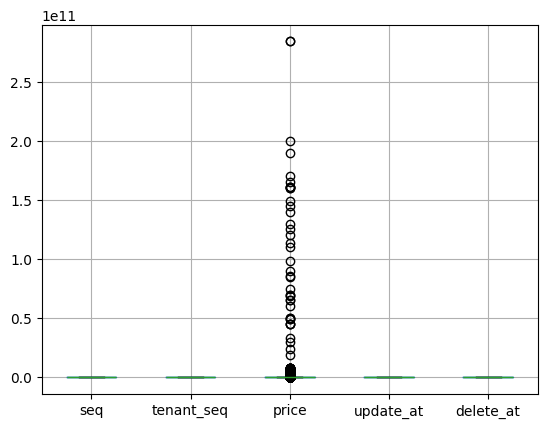

In [47]:
df.boxplot()
plt.show()

In [48]:
outliers = df[(df['price'] > 800000)]
# DB 에서 살펴본 결과 80만원이상부터 이상치를 확연하게 보임.

In [50]:
outliers.index #index 는 0부터 시작이니까 seq = index + 1 

Index([  151,   154,   214,   458,   459,   460,  3280,  3281,  3283,  3363,
       ...
       93364, 93365, 93366, 93367, 93368, 93369, 93370, 93371, 93372, 93373],
      dtype='int64', length=2593)

In [51]:
outliers

,seq,tenant_seq,title,price,content,image_url,create_at,update_at,delete_at
151,152,6743,페스츄리 바게트,690010800,페스츄리바게트 / 스리라차 에그마요 샌드위치 / 리코타 무화과 샌드위치,https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:32:51,0.0,0.0
154,155,6743,크림 치즈,28003200,대파 / 콘마요 / 허니바질 / 시나몬 / 어니언 / 트러플,https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:32:55,0.0,0.0
214,215,4519,케이크(a piece),90009500,0,https://search.pstatic.net/common/?autoRotate=...,2023-07-06 16:35:11,0.0,0.0
458,459,5634,탕수육,1500025000,0,0,2023-07-06 16:39:26,0.0,0.0
459,460,5634,고추잡채,2200035000,0,0,2023-07-06 16:39:27,0.0,0.0
...,...,...,...,...,...,...,...,...,...
93369,95243,7121,고추불고기피자,1600019000,소불고기에 매콤한 할라피뇨가 한가득~~,https://ldb-phinf.pstatic.net/20210926_23/1632...,2023-08-28 18:42:36,0.0,0.0
93370,95244,7121,야채피자,1300018000,"양파, 버섯, 피망, 옥수수, 올리브 등 신선한 야채가 듬뿍~ 프리미엄 웰빙 야채피자!",https://naverbooking-phinf.pstatic.net/2023030...,2023-08-28 18:42:37,0.0,0.0
93371,95245,7121,딥치즈베이컨피자대표,2100026000,"풍부한 치즈와 토마토소스, 풍미까지 더해져 특히 여성고객에게 인기만점 메뉴!",https://naverbooking-phinf.pstatic.net/2023030...,2023-08-28 18:42:37,0.0,0.0
93372,95246,7121,스페셜콤비네이션피자,1900024000,"파인애플, 페파로니, 햄, 미트볼, 베이컨, 양파, 버섯, 옥수수, 소시지, 피망 ...",https://naverbooking-phinf.pstatic.net/2023030...,2023-08-28 18:42:37,0.0,0.0


In [52]:
# 800000이라는 기준으로 그 이상의 수치값을 이상치라고 여기고 뽑아내면 총 2593개의 행의 가격이 뽑힌다. 

In [53]:
#len 값이 홀수면 중간지점 -1 까지의 값 , 중간 ~ 끝 지점까지의 값 으로 설정하고 거기에서 평균값? 
#len 값이 짝수면 중간지점 중간지점까지의 값, 중간 + 1 ~ 끝까지의 값으로 설정하고 거기에서 평균값 

In [55]:
temp_price = outliers['price'].to_list() # for 문에 넣어서 위의 로직대로 해보기 위해서 list 로 변경 

In [80]:
#string으로 변경한 후에 다시 한번 int 로 변경하고 둘 사이의 중간값으로 추출? 
price_adj = []

for idx , val in enumerate(temp_price):
    val = str(val) 
    min_price = 0
    max_price = 0
    medium_idx = 0
    if len(val) % 2 == 0: #짝수인 경우 
        print(val)
        medium_idx = (len(val) // 2) - 1 
        min_price = val[:medium_idx+1]
        max_price = val[medium_idx+1:]
        min_price, max_price = int(min_price), int(max_price)
        print(min_price, max_price)
        val = (min_price + max_price) // 2
        price_adj.append(val)
    else: #홀수인경우 
        print(val)
        medium_idx = round((len(val) // 2),0)
        min_price,max_price= val[:medium_idx] ,val[medium_idx :]
        min_price, max_price = int(min_price), int(max_price) 
        val = (min_price + max_price) // 2
        print(val)
        price_adj.append(val)
        
        
        

690010800
8850
28003200
2800 3200
90009500
9000 9500
1500025000
15000 25000
2200035000
22000 35000
2500040000
25000 40000
3500045000
35000 45000
4800058000
48000 58000
7000080000
70000 80000
700022000
14500
4000058000
40000 58000
990011900
10900
990016900
13400
990016900
13400
1090018900
10900 18900
1090018900
10900 18900
1190018900
11900 18900
1090019900
10900 19900
1090018900
10900 18900
2200026000
22000 26000
2200025000
22000 25000
900010000
9500
2200026000
22000 26000
2400028000
24000 28000
161000167000
161000 167000
284000297000
284000 297000
161000167000
161000 167000
161000167000
161000 167000
284000297000
284000 297000
1900027000
19000 27000
1900027000
19000 27000
2000028000
20000 28000
1900027000
19000 27000
2000028000
20000 28000
2300032000
23000 32000
1000017800
10000 17800
3000062000
30000 62000
2800070000
28000 70000
54006900
5400 6900
1000017800
10000 17800
1990024500
19900 24500
1990024500
19900 24500
650012500
9500
19000550000
284500
800014000
11000
2700039000
27000 390

val 값만 저장해서 price쪽을 수정하는 방식? 흠... 

In [85]:
len(price_adj)

2593

In [86]:
price_adj= pd.DataFrame(price_adj)

In [90]:
price_adj

,0
0,8850
1,3000
2,9250
3,20000
4,28500
...,...
2588,17500
2589,15500
2590,23500
2591,21500


update 방식이 어떻게 되는지 알면, 조건에 맞춰서 python 으로 값 수정한 후 밀어넣으면 될 것 같은데 ,,,,, 